In [231]:
!pip install opencv-contrib-python

In [232]:
import cv2
cv2.__version__

'4.8.1'

In [233]:
import cv2
import cv2.aruco as aruco
import numpy as np

# Define parameters for the CharucoBoard
num_squares_x = 7
num_squares_y = 10
square_length = 0.04  # length of each square side in meters
marker_length = 0.02  # length of the markers in meters
dictionary = aruco.getPredefinedDictionary(aruco.DICT_5X5_1000)  # you can choose a different dictionary

# Define a nonzero start ID for aruco markers
start_id = 200

# Create CharucoBoard with a nonzero start ID
board1 = aruco.CharucoBoard(
    (num_squares_x, num_squares_y),
    squareLength=square_length,
    markerLength=marker_length,
    dictionary=dictionary,
    ids=np.arange(start_id, start_id+num_squares_x*num_squares_y//2, dtype=np.int32)
)

board2 = aruco.CharucoBoard(
    (num_squares_x, num_squares_y),
    squareLength=square_length,
    markerLength=marker_length,
    dictionary=dictionary,
    ids=board1.getIds() + len(board1.getIds()),
)

In [234]:
len(board1.getIds()) + len(board2.getIds())

70

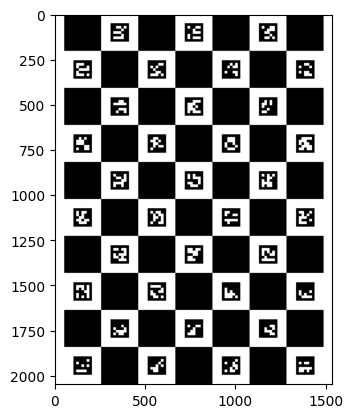

In [235]:
img1 = board1.generateImage((1536, 2048), marginSize=0)
plt.imshow(img1, cmap='gray')

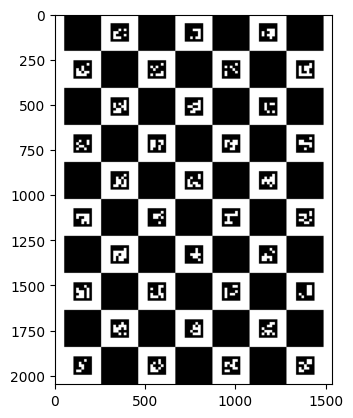

In [236]:
img2 = board2.generateImage((1536, 2048), marginSize=0)
plt.imshow(img2, cmap='gray')

In [237]:
cv2.imwrite('../renders/board1.png', img1)

True

In [238]:
cv2.imwrite('../renders/board2.png', img2)

True

In [ ]:
exr_path = '../renders/hdr.hdr'
hdr_img = cv2.imread(exr_path, cv2.IMREAD_ANYDEPTH | cv2.IMREAD_COLOR)

In [253]:
img = cv2.imread('../renders/marker_231207/IMG_0014.JPG')

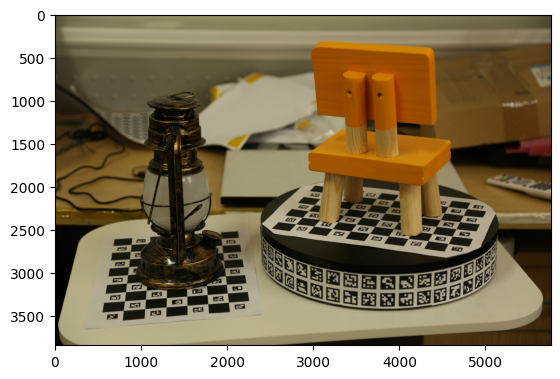

In [254]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [255]:
markerCorners1, markerIds1, rejectedImgPoints1 = cv2.aruco.detectMarkers(img, board1.getDictionary())

In [256]:
len(markerCorners1)

33

In [257]:
imgCopy = img.copy()
cv2.aruco.drawDetectedMarkers(imgCopy, markerCorners1, markerIds1);

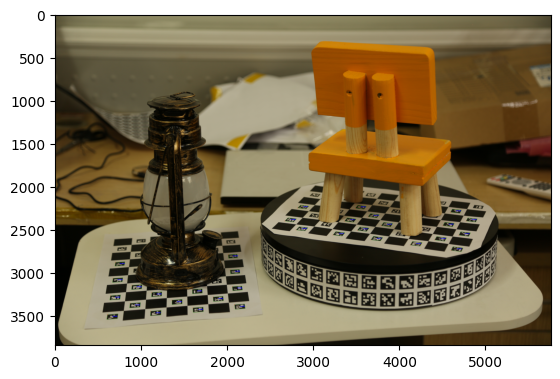

In [258]:
plt.imshow(cv2.cvtColor(imgCopy, cv2.COLOR_BGR2RGB))

In [259]:
cv2.imwrite('../renders/detectedMarkers.png', imgCopy)

True